# Package Installation

In [2]:
import openai
import pandas as pd
import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Your API key
openai.api_key = 'Your Key Here'

In [4]:
# Define a function to get GPT responses
def get_completion(prompt, model="gpt-4o-mini-2024-07-18"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

# **LLMs for Business Analytics**

## **1. Sentiment Analysis**
- **Positive vs. Negative**

### **How can sentiment analysis be used for business analytics?**
- Identify consumer sentiment from online reviews on social media platforms (Twitter (X), Facebook, TripAdvisor)
- Understand consumer satisfaction
- Improve products and services
- Manage brand reputation


#### Read in data
Data: hotel reviews on TripAdvisor platform

In [5]:
df = pd.read_csv('/Users/sheng/Jupyter/Chico_Demo/all_reviews_info123_sentment_binary_GPT4_simple_FirstRun_WeightSRApproach_Reasonings_FinalResponse.csv', index_col=0)

In [6]:
df.shape

(5408, 25)

In [7]:
df.head()

,hotels,urls,reviewer_name,review_date,trip_type,stay_date,revewer_location,contribution,helpful,review_title,...,Reviewer_service,Reviewer_rooms,Reviewer_clean,Reviewer_sleep,responser,response_date,responser_text,sentiment_ground_truth,sent_GPT4_reasonings,sent_GPT4_Weighting
0,Surety Hotel,https://www.tripadvisor.com/Hotel_Review-g3783...,Jodi307,Yesterday,Traveled as a couple,October 2022,"Charlotte, North Carolina",512.0,138.0,Charming hotel!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,Step 1#### The review is overwhelmingly positi...,positive
1,Surety Hotel,https://www.tripadvisor.com/Hotel_Review-g3783...,Mark T,Jan 2021,NaN,December 2020,"Manama, Bahrain",2.0,2.0,Excellent Downtown Hotel,...,5.0,5.0,5.0,5.0,"Response from Zander Srodes, Guest Services / ...","Jan 11, 2021",Thank you for taking the time to spread the wo...,positive,Step 1#### The review mentions several positiv...,positive
2,Surety Hotel,https://www.tripadvisor.com/Hotel_Review-g3783...,Callie P,Oct 11,Traveled as a couple,October 2022,NaN,1.0,NaN,Beautiful corner suite!,...,NaN,NaN,NaN,NaN,"Response from Allison Streu, General Manager a...",2 days ago,"calliep61, congratulations! We are so happy y...",positive,Step 1#### The review is overwhelmingly positi...,positive
3,Surety Hotel,https://www.tripadvisor.com/Hotel_Review-g3783...,492lori,Oct 11,Traveled with family,September 2022,"Johnston, Iowa",NaN,NaN,Excellent venue for a wedding.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,Step 1#### The review text is overwhelmingly p...,positive
4,Surety Hotel,https://www.tripadvisor.com/Hotel_Review-g3783...,Brian T,Oct 11,NaN,October 2022,NaN,2.0,NaN,Average stay for the price,...,2.0,2.0,4.0,4.0,NaN,NaN,NaN,negative,Step 1#### The review mentions specific issues...,negative


### 1.1. Look at the first review of the dataset

In [8]:
df['reviewer_text'][0]

'What a classy and unique hotel! It’s been renovated with lots of character, the service was friendly and efficient, and the bed & pillows were wonderfully comfortable! It’s in easy walking distance to the Pappajohn Sculpture Park, which we enjoyed exploring. Great hotel!!'

In [9]:
hotel_review = df['reviewer_text'][0]

In [10]:
prompt = f"""
What is the sentiment of the following hotel review, 
which is delimited with triple backticks?

Review text: '''{hotel_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the hotel review is very positive. The reviewer expresses satisfaction with the hotel's character, service, comfort, and location, highlighting several positive aspects and concluding with an enthusiastic remark.


In [11]:
prompt = f"""
What is the sentiment of the following hotel review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" or "negative".

Review text: '''{hotel_review}'''
"""
response = get_completion(prompt)
print(response)

positive


### 1.2. Sentiment analysis for multiple reviews using 'for loop' function
- e.g., 10 reviews

In [12]:
reviews = []
sentiments = []
for i in range(0, 10):
    review = df['reviewer_text'][i]

    prompt = f"""
    What is the sentiment of the following hotel review, which is delimited with triple backticks?

    Give your answer as a single word, either "positive" or "negative".

    Review text: ```{review}```
    """
    response = get_completion(prompt)

    reviews.append(review)
    sentiments.append(response)
    time.sleep(1)
    print(f'Review #{i}, Sentiment: {response} \n')

Review #0, Sentiment: positive 

Review #1, Sentiment: positive 

Review #2, Sentiment: positive 

Review #3, Sentiment: positive 

Review #4, Sentiment: negative 

Review #5, Sentiment: positive 

Review #6, Sentiment: positive 

Review #7, Sentiment: positive 

Review #8, Sentiment: positive 

Review #9, Sentiment: negative 



### 1.3. Create a dataframe with sentiment analysis results and export the dataframe to a CSV file

In [13]:
df_sent = pd.DataFrame({"review": reviews, "sentiment": sentiments})
df_sent

,review,sentiment
0,What a classy and unique hotel! It’s been reno...,positive
1,The hotel is at a great location to easily wal...,positive
2,We had a guest room block at the Surety for ou...,positive
3,Excellent venue for our son’s wedding! Rooms w...,positive
4,We had a broken sink and parking issues that t...,negative
5,We had planned a quick get away and the Surety...,positive
6,"Fantastic hotel, good location, friendly staff...",positive
7,"Good time, friendly bartenders, and staff. Cle...",positive
8,Hotel Surety is located at a walkable distance...,positive
9,The lighting situation was horribleThey are ru...,negative


In [14]:
df_sent.to_csv('/Users/sheng/Jupyter/Chico_Demo/SentimentExamples.csv')

# **LLMs for Business Analytics**

## **2. Identification of Emotions**
- **"Joy", "Sadness", "Anger", "Fear", "Trust", "Disgust", "Anticipation", "Surprise"**

### **How can identification of emotions be applied for business analytics?**
- Identify consumer emotions from online reviews on social media platforms (Twitter (X), Facebook, Yelp, TripAdvisor)
- Provide deep insights into consumer preferences and responses:
  - Trust → Loyalty
  - Fear → Safety-related products
  - Anticipation → Consumer-designed product features


### 2.1. Without specific emotions

In [15]:
prompt = f"""
Identify a list of emotions that the writer of the following review is expressing. 
Include no more than five items in the list. 
Format your answer as a list of lower-case words separated by commas.

Review text: '''{hotel_review}'''
"""
response = get_completion(prompt)
print(response)

excitement, satisfaction, appreciation, comfort, enjoyment


### 2.2. Identify anger

In [16]:
prompt = f"""
Is the writer of the following review expressing anger?
The review is delimited with triple backticks. 
Give your answer as either yes or no.

Review text: '''{hotel_review}'''
"""
response = get_completion(prompt)
print(response)

No


### 2.3. Eight Emotions

In [17]:
prompt = f"""

Your task is to classify a piece of text into the following emotion labels: “joy”, “sadness”, “anger”, “fear”, “trust”, “disgust”, “anticipation”, “surprise”. \

The review is delimited with triple backticks. 

Give your answer as a single word from one of the eight emotions.

Review text: '''{hotel_review}'''
"""
response = get_completion(prompt)
print(response)


joy


### 2.4. Identification of emotions for multiple reviews using 'for loop' function
- e.g., 10 reviews

In [18]:
emotions = []
for i in range(0, 10):
    review = df['reviewer_text'][i]

    prompt = f"""
    Your task is to classify a piece of text into the following emotion labels: “joy”, “sadness”, “anger”, “fear”, “trust”, “disgust”, “anticipation”, “surprise”. 

    The review is delimited with triple backticks. 

    Give your answer as a single word from one of the eight emotions.

    Review text: ```{review}```
    """
    response = get_completion(prompt)

    emotions.append(response)
    time.sleep(1)
    print(f'Review #{i}, Emotion: {response} \n')

Review #0, Emotion: joy 

Review #1, Emotion: joy 

Review #2, Emotion: joy 

Review #3, Emotion: joy 

Review #4, Emotion: sadness 

Review #5, Emotion: joy 

Review #6, Emotion: joy 

Review #7, Emotion: joy 

Review #8, Emotion: joy 

Review #9, Emotion: disgust 



### 2.5. Create a dataframe with sentiment analysis results and export the dataframe to a CSV file

In [19]:
df_sent_emo = pd.DataFrame({"review": reviews, "sentiment": sentiments, "emotion": emotions})
df_sent_emo

,review,sentiment,emotion
0,What a classy and unique hotel! It’s been reno...,positive,joy
1,The hotel is at a great location to easily wal...,positive,joy
2,We had a guest room block at the Surety for ou...,positive,joy
3,Excellent venue for our son’s wedding! Rooms w...,positive,joy
4,We had a broken sink and parking issues that t...,negative,sadness
5,We had planned a quick get away and the Surety...,positive,joy
6,"Fantastic hotel, good location, friendly staff...",positive,joy
7,"Good time, friendly bartenders, and staff. Cle...",positive,joy
8,Hotel Surety is located at a walkable distance...,positive,joy
9,The lighting situation was horribleThey are ru...,negative,disgust


In [20]:
df_sent_emo.to_csv('/Users/sheng/Jupyter/Chico_Demo/Sentiment_Emotions_Examples.csv')

## 3. Improving GenAI Performance
- Chain-of-Thought (CoT)
- Self-Reflection (SR)

In [21]:
# GPT 4.0o
def get_completion_4_0(prompt, model="gpt-4o-2024-05-13"):   # used in 04/24/2024
    messages = [{"role": "user", "content": prompt}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

In [23]:
def generate_prompt_CoT(text):
    
    delimiter = "####"    
    
    return f"""
    Follow these steps to determine the sentiment of the following hotel review, which is delimited with triple backticks.

    Review text: ```{text}```
    
    Step 1{delimiter} Assign an initial sentiment score ranging from 1 to 10, where 1 indicates very negative, and 10 means very positive. 
    - Pay attention to whether the review directly mentions overall satisfaction (e.g., "overall," "in general," or any statements indicating overall experience). 
    - If overall satisfaction is explicitly mentioned, weight it more heavily when determining the score.
    
    Step 2{delimiter} Label the review as positive if the initial sentiment score is 6 or greater, and negative if it is 5 or lower.
    
    Step 3{delimiter} Reflect on your responses from steps 1 and 2 and evaluate your confidence in the final label.    
    - If confident, briefly explain how you arrived at this conclusion, especially considering the overall satisfaction of the review.
    - If not confident, state that you are unsure and label the review as "unsure."

    Use the following format for your output:
    Step 1{delimiter} <step 1 reasoning>
    Step 2{delimiter} <step 2 reasoning>
    Step 3{delimiter} <step 3 reasoning>
    Final decision{delimiter} <a single word: "positive", "negative", or "unsure">

    Ensure to include {delimiter} to separate every step.
    """


In [24]:
df_CoT = df.copy()


In [25]:
# CoT results: first 5 reviews
sent_GPT4_CoT = []
num_examples = 5
for i in range(0, num_examples): 
    
    prompt = generate_prompt_CoT(df_CoT['reviewer_text'][i])
    
    response = get_completion_4_0(prompt)
    
    sent_GPT4_CoT.append(response)
    
    time.sleep(1)
    print(f'Review #{i}:\nOutput:\n{response} \n\n')

Review #0:
Output:
Step 1#### The review is overwhelmingly positive, mentioning several aspects of the hotel in a favorable light: "classy and unique," "renovated with lots of character," "friendly and efficient service," "wonderfully comfortable bed & pillows," and "easy walking distance to the Pappajohn Sculpture Park." The exclamation marks and the phrase "Great hotel!!" further emphasize the positive sentiment. Given these points, I would assign an initial sentiment score of 10.

Step 2#### Since the initial sentiment score is 10, which is greater than 6, the review is labeled as positive.

Step 3#### I am confident in this conclusion because the review explicitly mentions overall satisfaction with phrases like "Great hotel!!" and provides specific positive details about various aspects of the hotel experience. The tone and content of the review leave little room for ambiguity.

Final decision#### positive 


Review #1:
Output:
Step 1#### The review mentions several positive aspect

In [26]:
# Output with single word
delimiter = "####"    
final_responses = []
for i in sent_GPT4_CoT:
    try:
        final_response = i.split(delimiter)[-1].strip()
    except Exception as e:
        final_response = "No final decision"

    print(final_response)
    final_responses.append(final_response)

positive
positive
positive
positive
negative


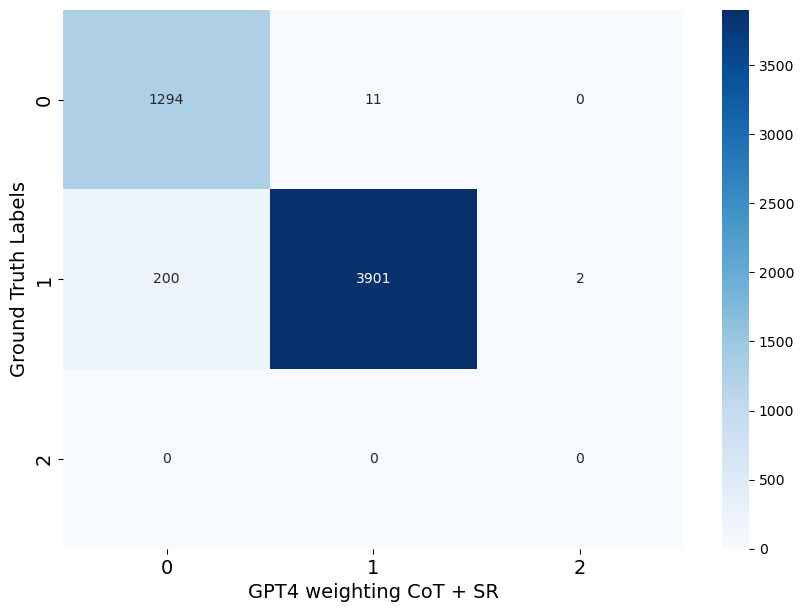

              precision    recall  f1-score   support

    negative     0.8661    0.9916    0.9246      1305
    positive     0.9972    0.9508    0.9734      4103
      unsure     0.0000    0.0000    0.0000         0

    accuracy                         0.9606      5408
   macro avg     0.6211    0.6474    0.6327      5408
weighted avg     0.9656    0.9606    0.9616      5408



/Users/sheng/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sheng/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sheng/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Confusion matrix
conf_matrix = confusion_matrix(df_CoT['sentiment_ground_truth'], df_CoT['sent_GPT4_Weighting'])       #(y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
# plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('GPT4 weighting CoT + SR', fontsize=14)
plt.ylabel('Ground Truth Labels', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
# plt.savefig("/Users/sheng/Downloads/GPT_CM.png")
plt.show()

report = classification_report(df_CoT['sentiment_ground_truth'], df_CoT['sent_GPT4_Weighting'], digits=4)
print(report)

### Analyze 'unsure' reviews

In [28]:
df_CoT_Unsure = df_CoT[df_CoT['sent_GPT4_Weighting'] == 'unsure']

In [29]:
print(df_CoT_Unsure['sent_GPT4_reasonings'][726])

Step 1#### The review text provided does not directly mention the hotel experience or overall satisfaction with the stay. Instead, it focuses on a personal anecdote about shoes and a memory involving the reviewer's mother. Given the lack of direct information about the hotel experience, it is challenging to assign a sentiment score based on the provided text. Therefore, I would assign an initial sentiment score of 5, as it is neutral and does not provide enough context to lean towards either positive or negative.

Step 2#### Based on the initial sentiment score of 5, the review would be labeled as negative according to the given criteria.

Step 3#### I am not confident in the final label because the review does not provide any information about the hotel experience. The text is more of a personal story rather than a review of the hotel. Therefore, it is difficult to determine the sentiment accurately.

Final decision#### unsure


In [30]:
print(df_CoT_Unsure['reviewer_text'][726])

Momma said you can tell a lot by a persons shoes, "where their going and where they been." I don't remember my first birthday but I do remember my first pair of shoes. Momma said they would make me straight as an arrow. Those were my special shoes...


In [ ]:
# print(df_CoT_Unsure['sent_GPT4_reasonings'][1594])

In [ ]:
# print(df_CoT_Unsure['reviewer_text'][1594])


In [31]:
df_CoT_NoUnsure = df_CoT[df_CoT['sent_GPT4_Weighting'] != 'unsure']

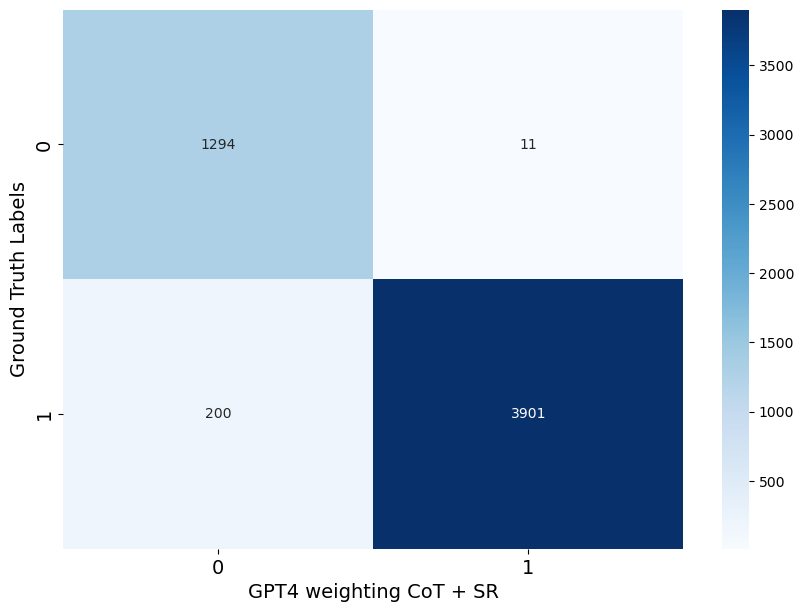

              precision    recall  f1-score   support

    negative     0.8661    0.9916    0.9246      1305
    positive     0.9972    0.9512    0.9737      4101

    accuracy                         0.9610      5406
   macro avg     0.9317    0.9714    0.9491      5406
weighted avg     0.9656    0.9610    0.9618      5406



In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(df_CoT_NoUnsure['sentiment_ground_truth'], df_CoT_NoUnsure['sent_GPT4_Weighting'])       #(y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
# plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('GPT4 weighting CoT + SR', fontsize=14)
plt.ylabel('Ground Truth Labels', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
# plt.savefig("/Users/sheng/Downloads/GPT_CM.png")
plt.show()

report = classification_report(df_CoT_NoUnsure['sentiment_ground_truth'], df_CoT_NoUnsure['sent_GPT4_Weighting'], digits=4)
print(report)

## CoT and SR for GPT4 significantly increased accuracy from 87% to 96%.